In [34]:
import re
import unicodedata
import itertools

import pandas as pd
import numpy as np
import pandas

import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

sns.set_theme(style='whitegrid')
palette='viridis'

import warnings
warnings.filterwarnings("ignore")

# Database

In [35]:
# Database
df = pd.read_csv("spotify_songs.csv")
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [36]:
# Viewing first 5 data
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [37]:
# Viewing 5 latest data
df.tail()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500


In [38]:
# Info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [39]:
# Type data
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [40]:
# Viewing rows and columns
df.shape

(32833, 23)

In [41]:
# Copy data
data = df.copy()

# Exploratory data analysis

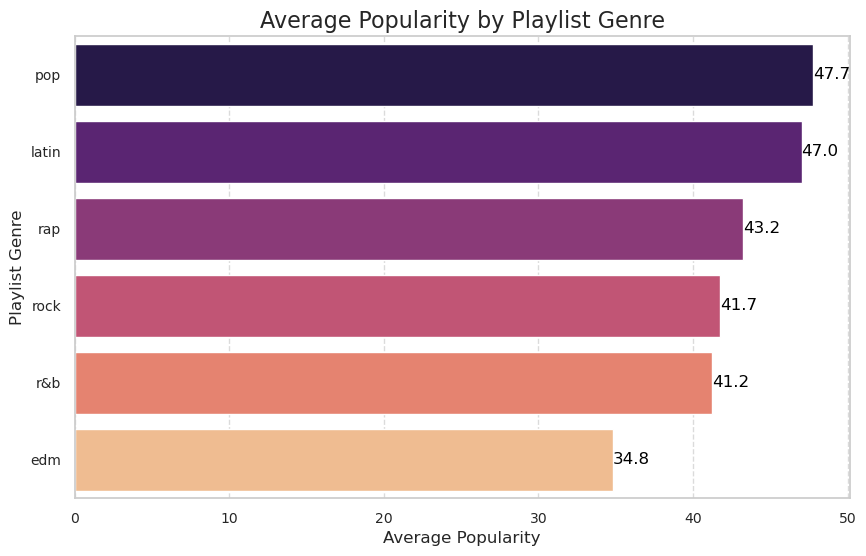

In [42]:
# Average popularity by playlist genre, sorted in descending order
playlist_popularity = data.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

# Plotting with improvements
plt.figure(figsize=(10, 6))
sns.barplot(x=playlist_popularity.values, y=playlist_popularity.index, palette='magma')

# Adding data labels
for index, value in enumerate(playlist_popularity.values):
    plt.text(value, index, f'{value:.1f}', va='center', ha='left', color='black')

# Enhancing readability
plt.title('Average Popularity by Playlist Genre', fontsize=16)
plt.xlabel('Average Popularity', fontsize=12)
plt.ylabel('Playlist Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding gridlines for comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

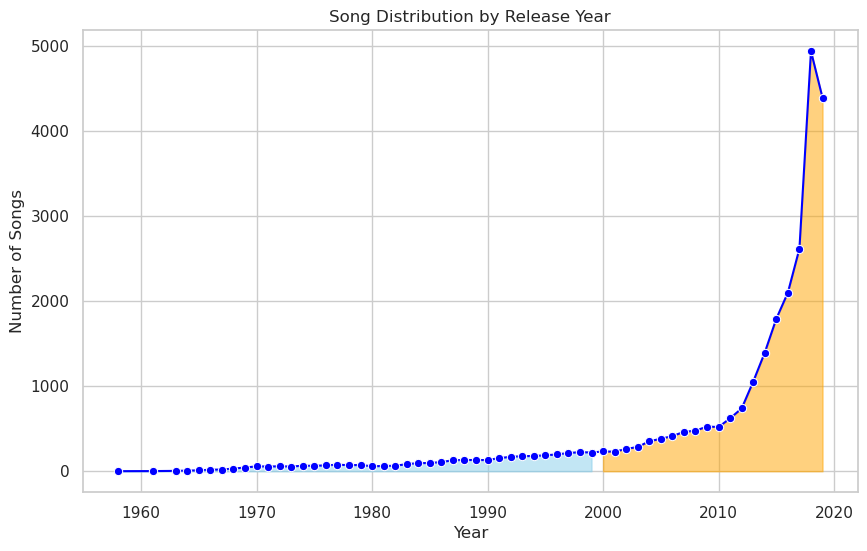

In [ ]:
# Assuming your DataFrame is named df and has a 'track_album_release_date' column
data['year'] = pd.to_datetime(data['track_album_release_date'], errors='coerce').dt.year

# Counting the number of songs released each year
yearly_tracks = data['year'].value_counts().sort_index()


yearly_tracks = yearly_tracks[yearly_tracks.index < 2023] 

# Smoothing the trend with a rolling average
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

# Plotting the smoothed trend with annotations and color coding
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Song Distribution by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)

# Adding annotations for key points
max_year = yearly_tracks.idxmax()
max_value = yearly_tracks.max()
plt.annotate(f'Maximum in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value + 500),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

# Color coding different eras
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2000, color='skyblue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2000, color='orange', alpha=0.5)

plt.show()

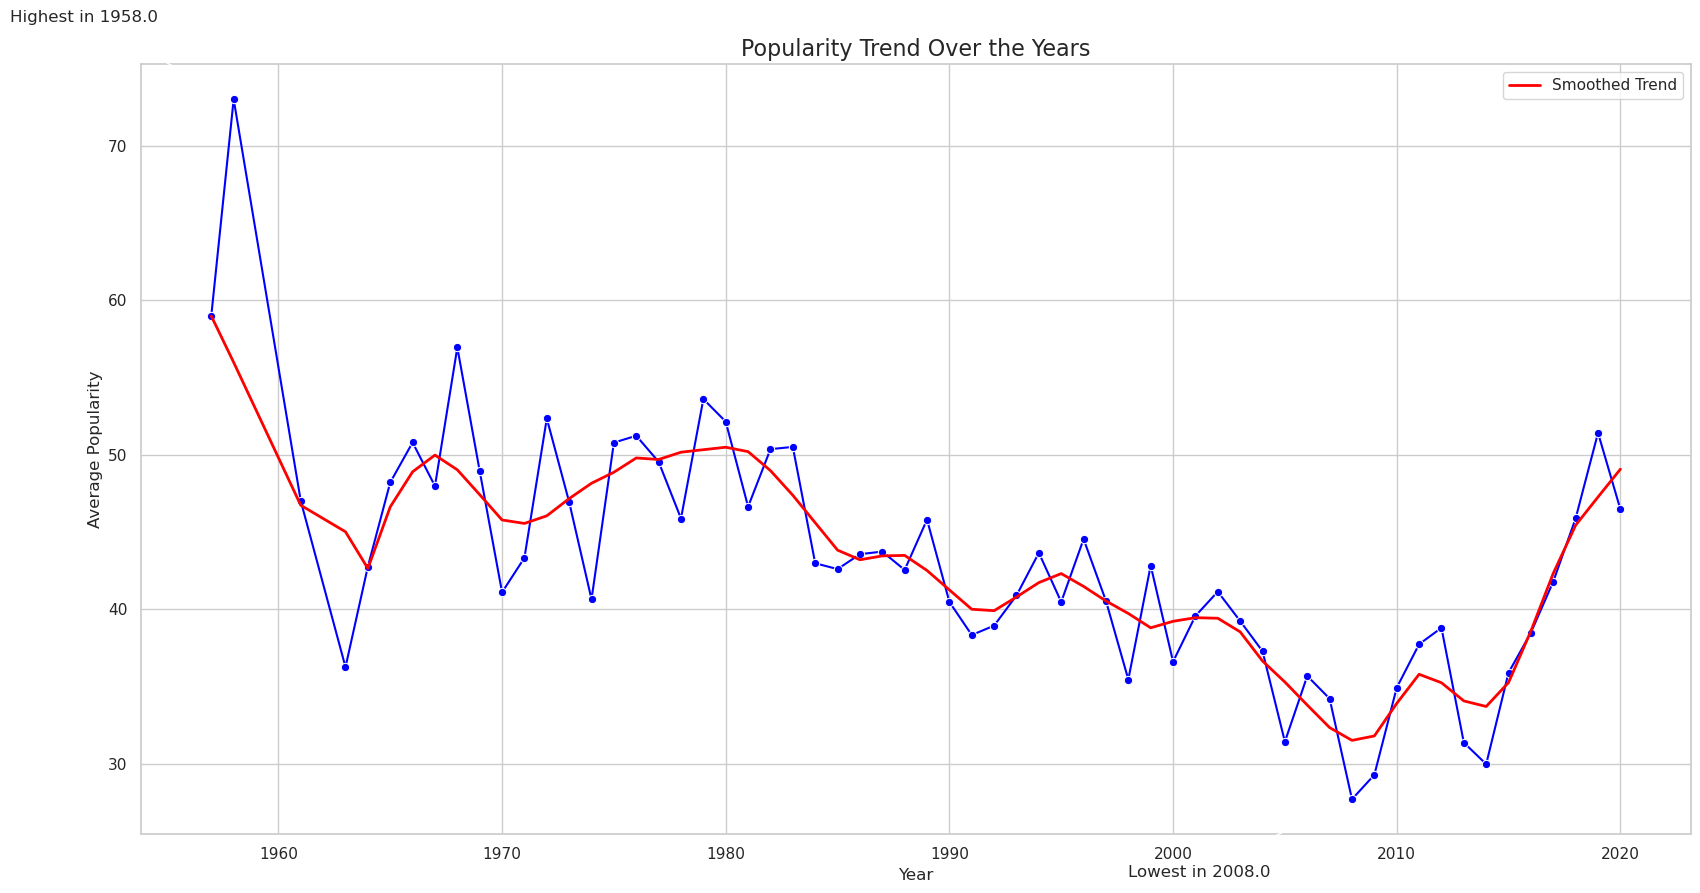

In [45]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Calculate the average popularity for each year
yearly_popularity = data.groupby('year')['track_popularity'].mean()

# Calculate smoothed trend line
smoothed = lowess(yearly_popularity.values, yearly_popularity.index, frac=0.1)

plt.figure(figsize=(20, 10))
sns.lineplot(x=yearly_popularity.index, y=yearly_popularity.values, marker='o', color='blue')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', lw=2, label='Smoothed Trend')
plt.title('Popularity Trend Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)

# Annotate the peak and trough
max_year = yearly_popularity.idxmax()
max_value = yearly_popularity.max()
plt.annotate(f'Highest in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value+5),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

min_year = yearly_popularity.idxmin()
min_value = yearly_popularity.min()
plt.annotate(f'Lowest in {min_year}', xy=(min_year, min_value), xytext=(min_year-10, min_value-5),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.legend()
plt.show()

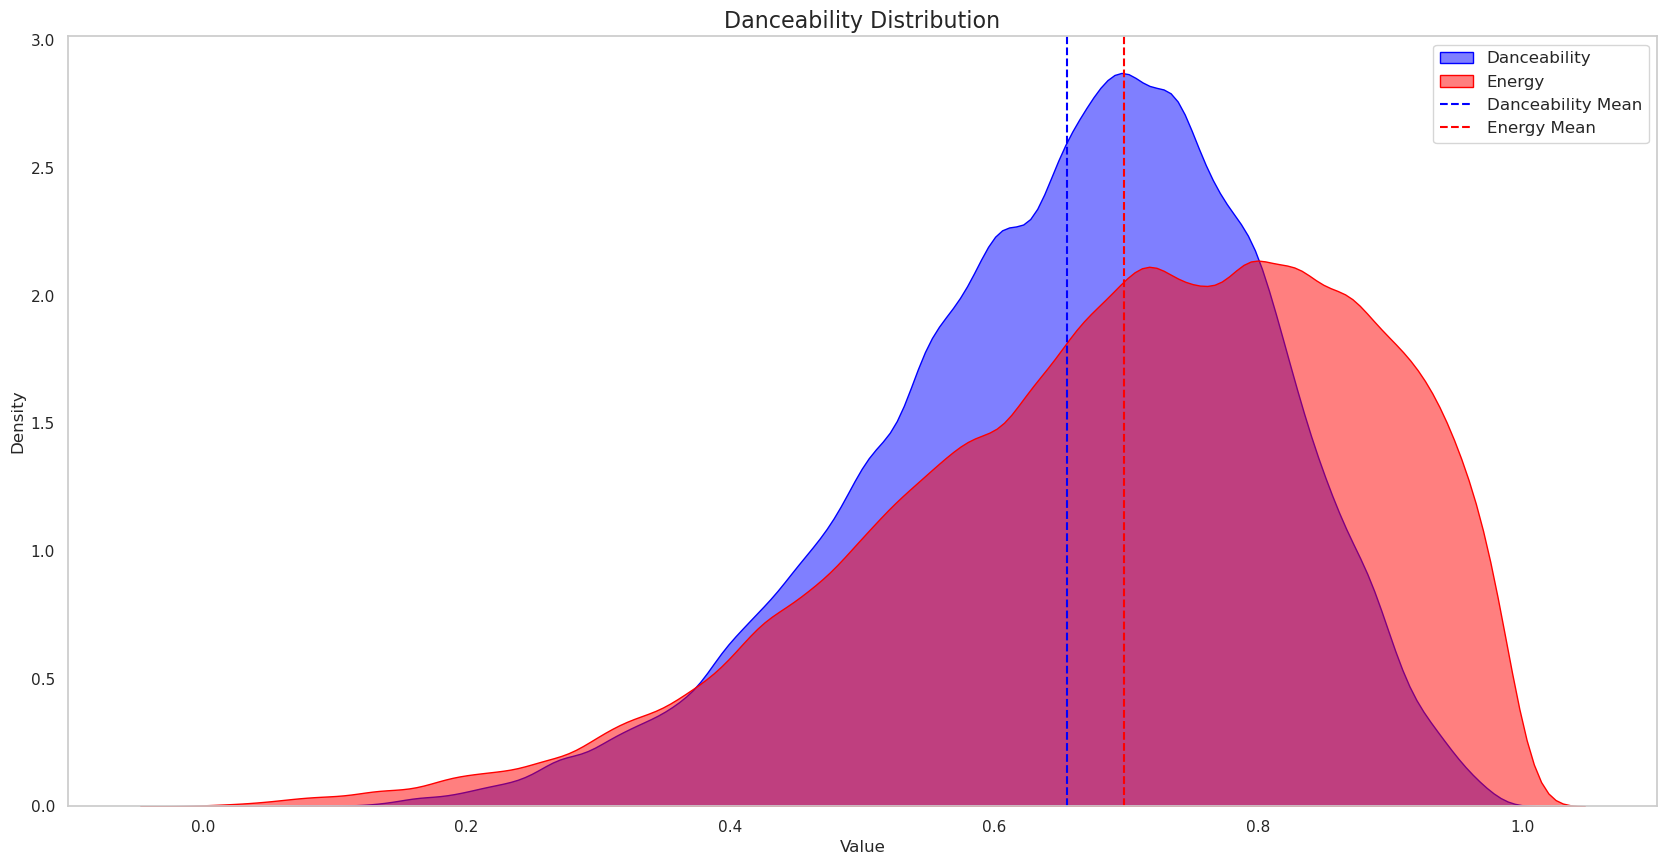

In [46]:
# plot Danceability Distribution
plt.figure(figsize=(20.5, 10))
sns.kdeplot(df['danceability'], shade=True, label='Danceability', color='blue', alpha=0.5, bw_adjust=0.7)
sns.kdeplot(df['energy'], shade=True, label='Energy', color='red', alpha=0.5, bw_adjust=0.7)
plt.axvline(df['danceability'].mean(), color='blue', linestyle='--', label='Danceability Mean')
plt.axvline(df['energy'].mean(), color='red', linestyle='--', label='Energy Mean')
plt.title('Danceability Distribution', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(False)
plt.show()

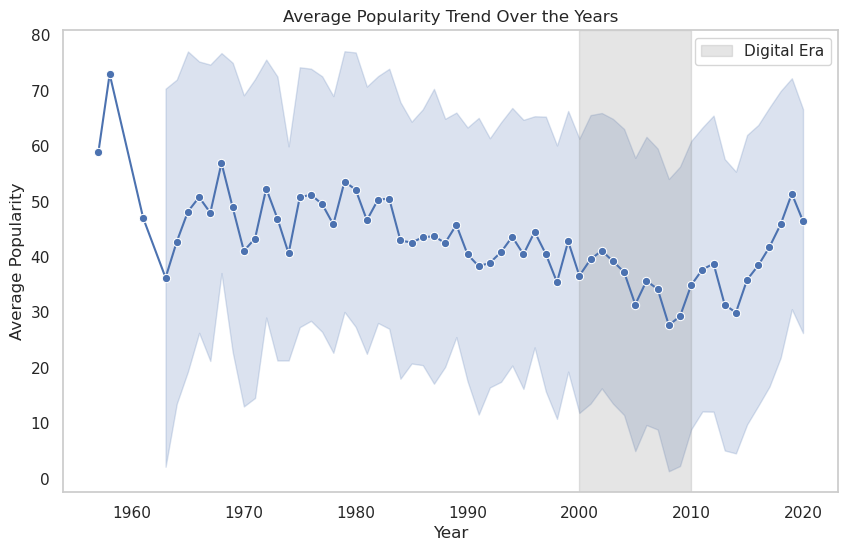

In [47]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='track_popularity', data=data, ci='sd', marker='o')
plt.axvspan(2000, 2010, color='gray', alpha=0.2, label='Digital Era')
plt.title('Average Popularity Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.legend()
plt.grid(False)
plt.show()

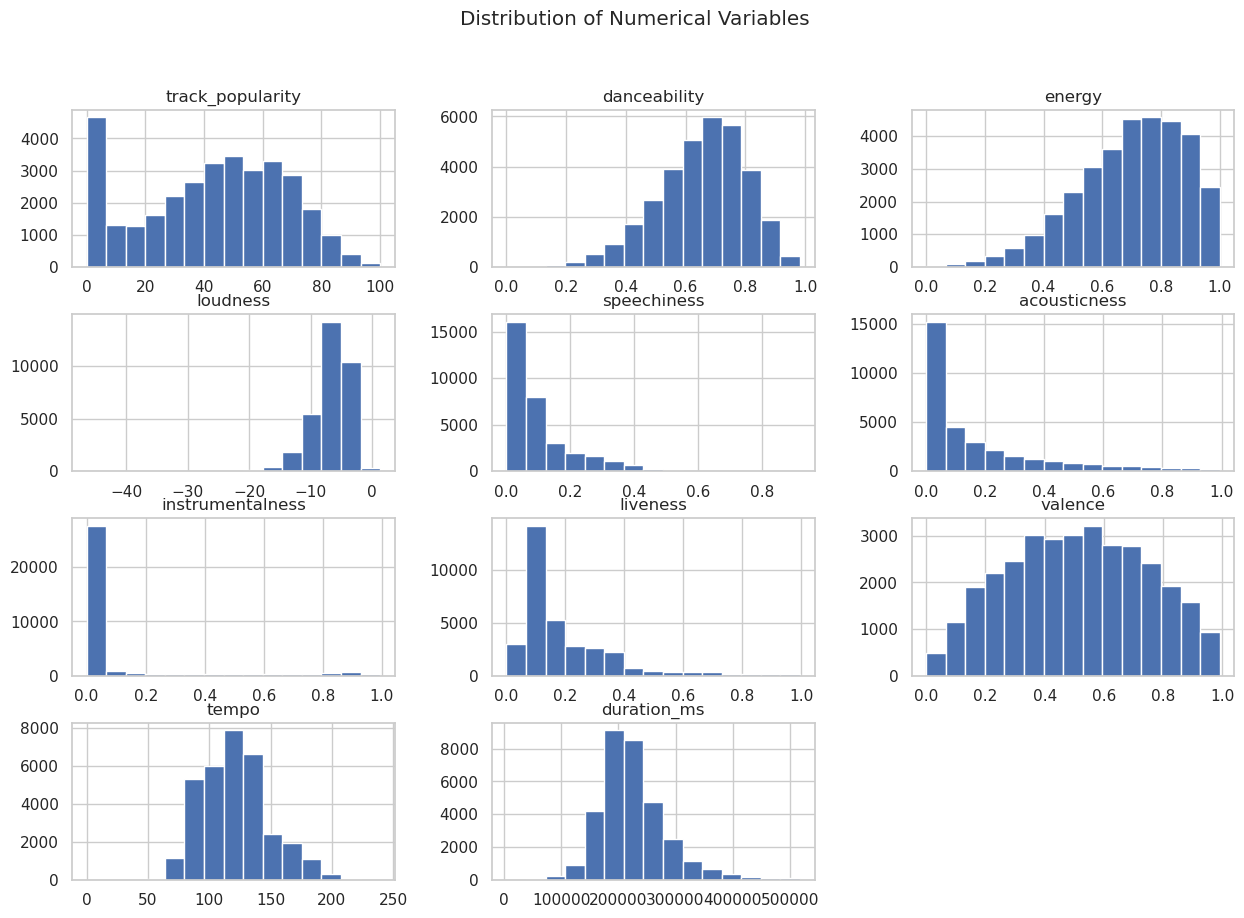


playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

track_artist
Martin Garrix                161
Queen                        136
The Chainsmokers             123
David Guetta                 110
Don Omar                     102
Drake                        100
Dimitri Vegas & Like Mike     93
Calvin Harris                 91
Hardwell                      84
Kygo                          83
Name: count, dtype: int64


In [48]:
numerical_columns = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

# Frequency of categorical variables
print()
print(df['playlist_genre'].value_counts())

# Top 10 most frequent artists
print()
print(df['track_artist'].value_counts().head(10))

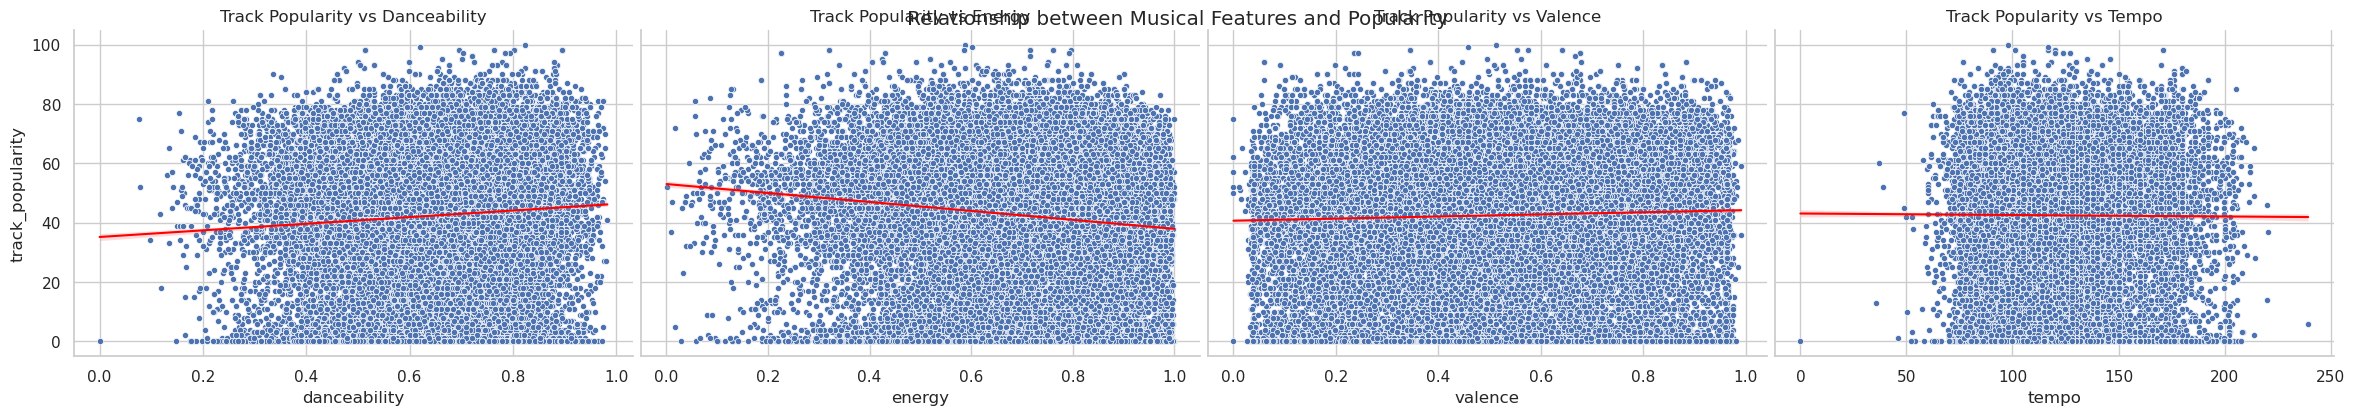

In [49]:
# Creating the pairplot with scatter plots
g = sns.pairplot(df,
                 x_vars=['danceability', 'energy', 'valence', 'tempo'],
                 y_vars='track_popularity',
                 height=4,
                 aspect=1.5,  # Aspect ratio to make the plots wider
                 kind='scatter',  # Keep scatter plot to customize points
                 plot_kws={'s': 20, 'edgecolor': 'w', 'linewidth': 0.5}  # Customize the point size and edges
)

# Manually adding regression lines
for ax in g.axes.flat:
    # Ensure we access the correct x and y data for the regression plot
    sns.regplot(
        x=ax.collections[0].get_offsets()[:, 0],  # Extracting x data from scatter plot
        y=ax.collections[0].get_offsets()[:, 1],  # Extracting y data from scatter plot
        ax=ax,
        scatter=False,  # Hide the scatter plot in the regplot to avoid duplication
        color='red',
        line_kws={'linewidth': 1.5}  # Customize the regression line width
    )

# Adding titles for each subplot
for ax, feature in zip(g.axes.flat, ['Danceability', 'Energy', 'Valence', 'Tempo']):
    ax.set_title(f'Track Popularity vs {feature}')

# Adding a general title for the entire figure
plt.suptitle('Relationship between Musical Features and Popularity', y=1.02)

# Display the plot
plt.show()

# Training and testing division

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Splitting the dataset into training and testing
train_data, test_data = train_test_split(df, test_size=0.25, random_state=12)

print("Viewing training x_train", train_data.shape)
print("Viewing test test_data", test_data.shape)

Viewing training x_train (24624, 23)
Viewing test test_data (8209, 23)


In [53]:
interaction_matrix = train_data.pivot_table(index='playlist_id', columns='track_id', values='track_popularity').fillna(0)
interaction_matrix

track_id,0017A6SJgTbfQVU2EtsPNo,004s3t0ONYlzxII9PLgU6z,008rk8F6ZxspZT4bUlkIQG,00EPIEnX1JFjff8sC6bccd,00FR9VQ0uzF4NNxVKKiMz2,00FROhC5g4iJdax5US8jRr,00Gu3RMpDW2vO9PjlMVFDL,00GxbkrW4m1Tac5xySEJ4M,00HIh9mVUQQAycsQiciWsh,00Hveeqs6yqFu6MvZ50rj9,...,7zsNAP0yvZq3aeIoAfyQj6,7zsXy7vlHdItvUSH8EwQss,7ztN8tfXYaC8LBRyLZJLA1,7ztcWZ0EB6akSzlb8BUaqG,7zxLkZbUxITHabPzGN8Xgc,7zxRMhXxJMQCeDDg0rKAVo,7zyLObYw4QUKQDyZOb4J0Y,7zycSpvjDcqh6YT1FEl2kY,7zye9v6B785eFWEFYs13C2,7zzZmpw8L66ZPjH1M6qmOs
playlist_id,,,,,,,,,,,,,,,,,,,,,
0275i1VNfBnsNbPl0QIBpG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03qQtbNHoJuFezRu2CnLuF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03sDEv7FN58Mb9CJOs1Tgn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06zrBJ5cts5aemZmqe80J7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07SNJ4MwYba9wwmzrbjmYi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7sq6nuruoMyDhEWkX2oYOg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7tkgK1tm9hYkWp7EFyOcAr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7vJOXFe40axY7qS39vGDyH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Finding the value of K

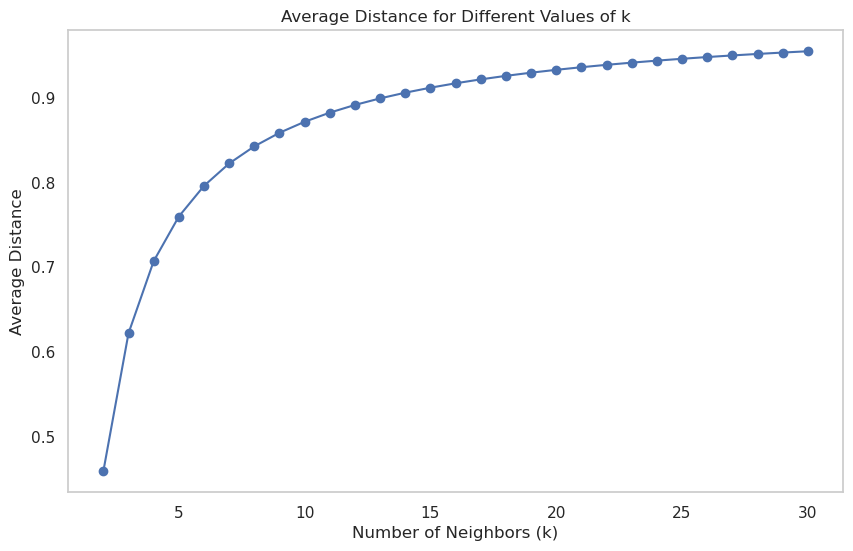

Best value of k: 2


In [62]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

# List of k values to test
k_values = list(range(2, 31))

# Metric to store the results
mean_distances = []

# Loop to find the best k
for k in k_values:
    model = NearestNeighbors(n_neighbors=k, metric='cosine')
    model.fit(interaction_matrix)

    # Compute the distances and indices of the nearest neighbors
    distances, indices = model.kneighbors(interaction_matrix)

    # Calculate the average distance to the nearest neighbors
    mean_distance = np.mean(distances)
    mean_distances.append(mean_distance)

# Plotting the average distance metric for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_distances, marker='o')
plt.title('Average Distance for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Distance')
plt.grid(False)
plt.show()

# Find the best k (the one that minimizes the average distance)
best_k = k_values[np.argmin(mean_distances)]
print(f"Best value of k: {best_k}")

# Collaborative Filtering-Based Recommendation Model

In [63]:
# Adjusting k to test a larger value
model = NearestNeighbors(n_neighbors=best_k, metric='cosine')
model.fit(interaction_matrix)

NearestNeighbors(metric='cosine', n_neighbors=2)

# Part 7 - Making recommendation

In [64]:
data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014.0
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013.0
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014.0
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014.0


In [89]:
# Predefined song to base recommendations on
# Replace with the song you want to start with
default_song_name = "Shape of You"

def recommend_songs(df, model, interaction_matrix, song_name=default_song_name, k=10):
    # Find the playlist(s) that contain the predefined song
    song_playlists = df[df['track_name'].str.contains(song_name, case=False, na=False)]['playlist_id'].unique()

    if len(song_playlists) == 0:
        print("Song not found in the dataset.")
        return

    # Get the index of the first playlist where the song was found
    playlist_id = song_playlists[0]

    # Get unique playlist IDs and their corresponding indices in interaction_matrix
    unique_playlists = df['playlist_id'].unique()

    if playlist_id not in unique_playlists:
        print("Playlist ID not found in unique playlists.")
        return

    playlist_index = np.where(unique_playlists == playlist_id)[0][0]

    # Find similar playlists using KNN
    try:
        # If interaction_matrix is a DataFrame, use .iloc to get the row
        if isinstance(interaction_matrix, pd.DataFrame):
            distances, indices = model.kneighbors(interaction_matrix.iloc[playlist_index].values.reshape(1, -1), n_neighbors=k+1)
        else:
            distances, indices = model.kneighbors(interaction_matrix[playlist_index].reshape(1, -1), n_neighbors=k+1)
    except IndexError:
        print("Playlist index is out of bounds in the interaction matrix.")
        return

    # Remove the index of the original playlist
    similar_playlists = indices.flatten()[1:]  # Ignoring the first one, which is the original playlist

    # Identify songs to recommend
    original_playlist_tracks = set(df[df['playlist_id'] == playlist_id]['track_id'])
    recommended_tracks = set()

    for idx in similar_playlists:
        similar_playlist_id = unique_playlists[idx]
        similar_playlist_tracks = set(df[df['playlist_id'] == similar_playlist_id]['track_id'])
        recommended_tracks.update(similar_playlist_tracks - original_playlist_tracks)

    # Display the recommended songs
    if recommended_tracks:
        recommended_tracks_info = df[df['track_id'].isin(recommended_tracks)][['track_name', 'track_artist']].drop_duplicates()
        print("Recommended songs")
        print(recommended_tracks_info)
    else:
        print("No new songs to recommend.")

# Example usage
# Assuming df, model, and interaction_matrix are already defined
print("Music selection : ", default_song_name)
recommend_songs(df, model, interaction_matrix)

Music selection :  Shape of You
Recommended songs
                           track_name          track_artist
155         This Is What You Came For         Calvin Harris
287    Whenever (feat. Conor Maynard)  Kris Kross Amsterdam
499                Break the Distance                 ELYAZ
500          I Could Get Used To This            Becky Hill
501                           Therapy      Armin van Buuren
...                               ...                   ...
23642                     Smoke Alone           Minty Burns
23644                 Breaking Me Off                R3load
23647                          Zabuza             NoBodyGHY
23650          Come Thru (with Usher)         Summer Walker
23653       I Forgot That You Existed          Taylor Swift

[547 rows x 2 columns]


# Euclidean distance

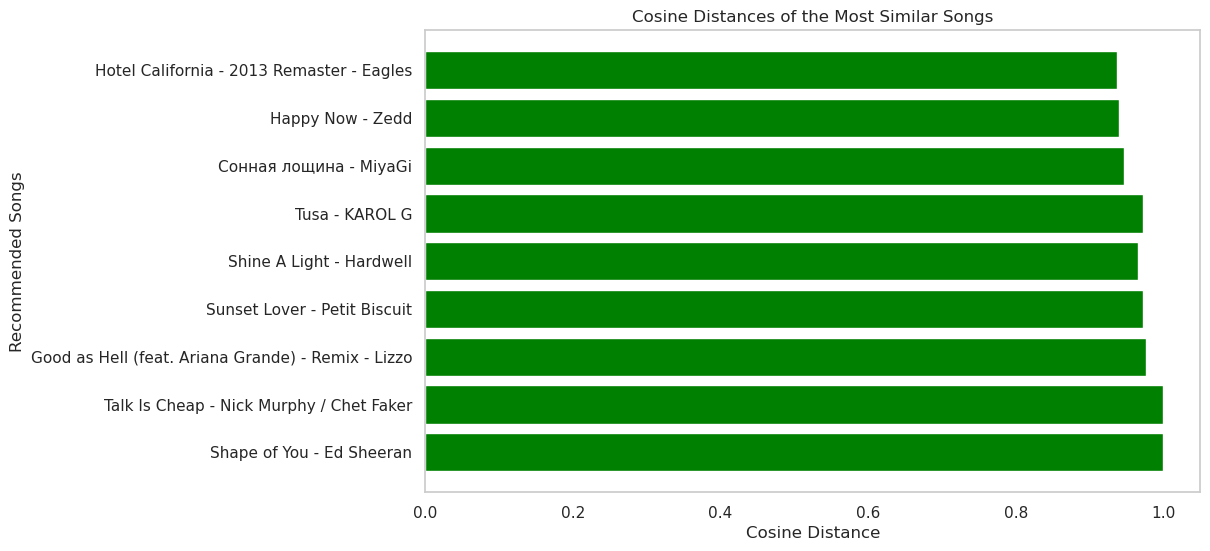

In [66]:
from sklearn.metrics.pairwise import cosine_distances

def plotar_distancias_musicas(interaction_matrix, df, playlist_index, k=10):
    # Calculate the cosine distance between the selected playlist and all others
    if isinstance(interaction_matrix, pd.DataFrame):
        cosine_distances_array = cosine_distances(interaction_matrix.iloc[playlist_index].values.reshape(1, -1), interaction_matrix)
    else:
        cosine_distances_array = cosine_distances(interaction_matrix[playlist_index].reshape(1, -1), interaction_matrix)

    # Sort the playlists based on the cosine distance
    sorted_indices = cosine_distances_array.argsort().flatten()

    # Ignore the first index as it will be the playlist itself
    similar_playlists = sorted_indices[1:k+1]

    # Extract the cosine distances of the recommended playlists
    similar_playlists_distances = cosine_distances_array.flatten()[similar_playlists]

    # Map the most popular songs from each similar playlist
    music_names = []
    for idx in similar_playlists:
        playlist_id = df['playlist_id'].unique()[idx]
        popular_music = df[df['playlist_id'] == playlist_id].sort_values(by='track_popularity', ascending=False).iloc[0]
        music_names.append(f"{popular_music['track_name']} - {popular_music['track_artist']}")

    # Plot the cosine distances
    plt.figure(figsize=(10, 6))
    plt.barh(music_names, similar_playlists_distances, color='green')
    plt.xlabel('Cosine Distance')
    plt.ylabel('Recommended Songs')
    plt.title('Cosine Distances of the Most Similar Songs')
    plt.gca().invert_yaxis()  # Invert y-axis so the most similar song is at the top
    plt.grid(False)
    plt.show()

# Example usage
playlist_index = 0  # Replace with the index of the playlist you want to analyze
plotar_distancias_musicas(interaction_matrix, df, playlist_index, k=10)

# Recommendation system - Group songs into clusters based on their characteristics and recommend songs within these clusters

In [67]:
# Database
data = pd.read_csv("spotify_songs.csv")
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [68]:
# 1. Select the relevant features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

X = data[features]

In [69]:
# Scaling data
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Viewing
scaler

StandardScaler()

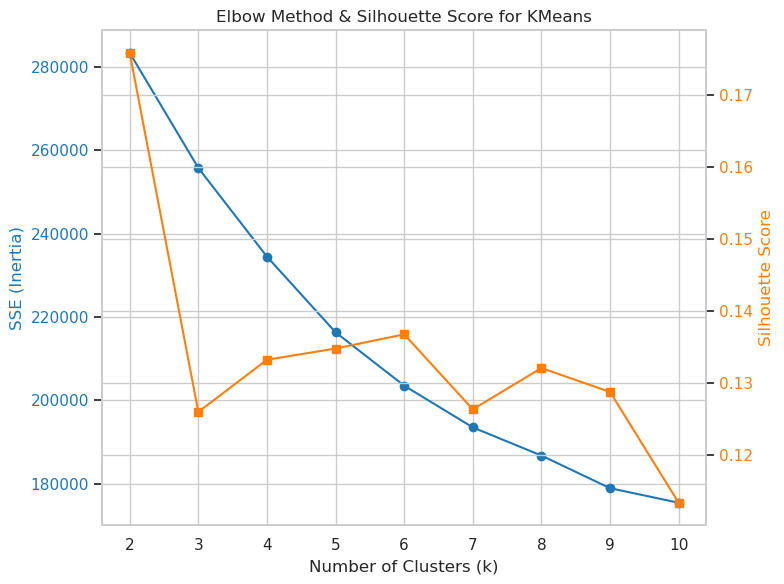

Best k by silhouette score: 2


In [73]:
from sklearn.cluster import KMeans


# Determine the optimal number of clusters using the elbow method & silhouette score
sse = []
silhouette_scores = []
k_range = range(2, 11)  # silhouette score needs at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot elbow method
fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('SSE (Inertia)', color=color)
ax1.plot(k_range, sse, marker='o', color=color, label='SSE (Elbow Method)')
ax1.tick_params(axis='y', labelcolor=color)

# Twin axis for silhouette score
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(k_range, silhouette_scores, marker='s', color=color, label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow Method & Silhouette Score for KMeans')
fig.tight_layout()
plt.show()

# Best k by silhouette score
best_k_silhouette = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k by silhouette score: {best_k_silhouette}")


In [ ]:
kmeans = KMeans(n_clusters=6, random_state=55)
data['cluster_kmeans'] = kmeans.fit_predict(X_scaled)
kmeans

KMeans(n_clusters=6, random_state=55)

In [75]:
# Viewing total cluster
data.cluster_kmeans.value_counts()

cluster_kmeans
0    10763
1     8469
5     4680
4     4323
3     2470
2     2128
Name: count, dtype: int64

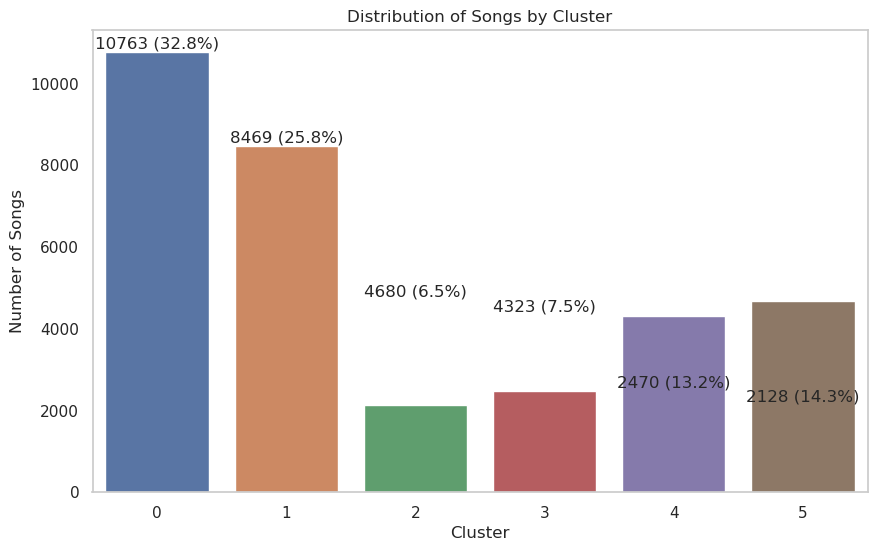

In [76]:
# Count of songs in each cluster
cluster_counts = data['cluster_kmeans'].value_counts().sort_values(ascending=False)

# Calculate the percentage of each cluster
total_songs = cluster_counts.sum()
cluster_percentages = (cluster_counts / total_songs) * 100

# Plot the distribution of clusters with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='deep')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs by Cluster')

# Adding data labels on top of bars
for index, value in enumerate(cluster_counts):
    plt.text(index, value + 100, f'{value} ({cluster_percentages[index]:.1f}%)', ha='center', fontsize=12)

plt.grid(False)
plt.show()

In [77]:
from sklearn.decomposition import PCA

# 2. Perform PCA Analysis
pca = PCA(n_components=2)

# Apply PCA on the scaled feature set X_scaled and transform the data into the new 2-dimensional space.
X_pca = pca.fit_transform(X_scaled)

# Output the PCA model object, which contains information such as the amount of variance explained by each principal component.
pca

PCA(n_components=2)

# Cluster visualization

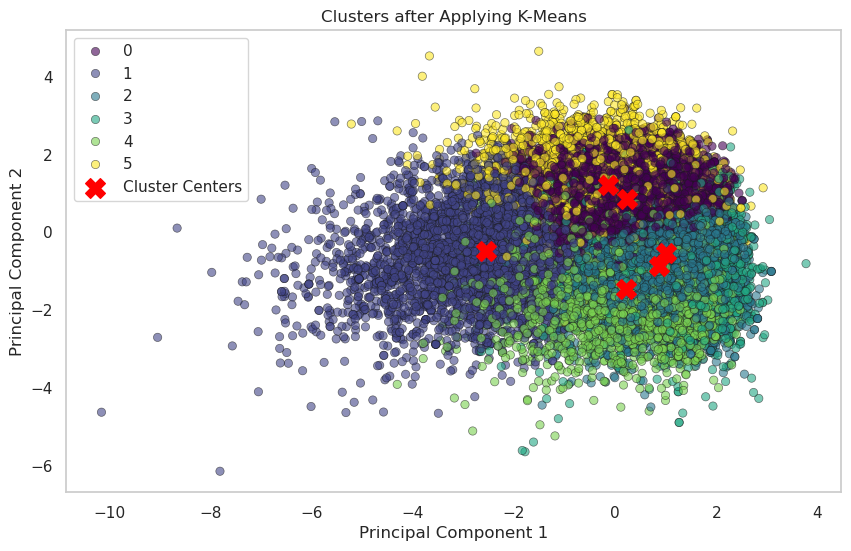

In [79]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['cluster_kmeans'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0],
                y=X_pca[:, 1],
                hue=data['cluster_kmeans'],
                palette='viridis',
                alpha=0.6,
                edgecolor='k')

# Adding the cluster centers
centers = kmeans.cluster_centers_
# Projecting the centers to the 2D PCA space
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
            c='red',
            s=200,
            marker='X',
            label='Cluster Centers')

plt.title('Clusters after Applying K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(False)
plt.show()

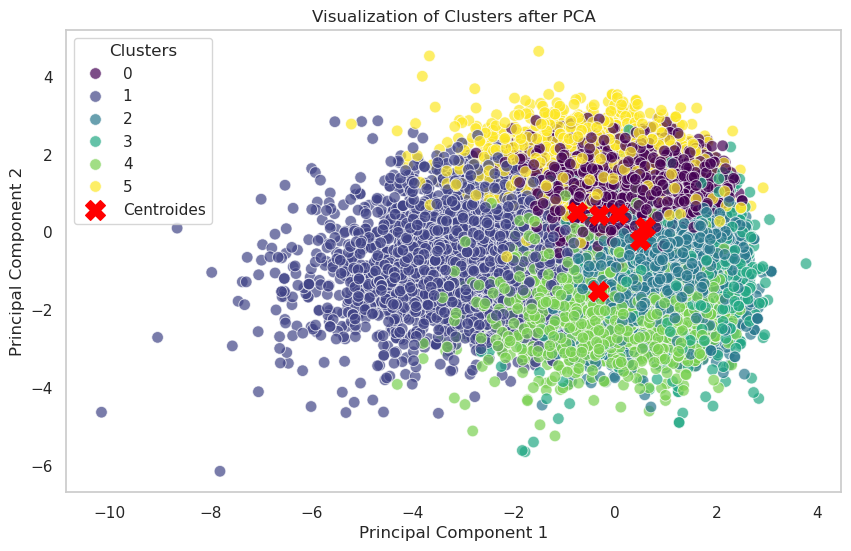

In [80]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster_kmeans'], palette='viridis', s=70, alpha=0.7)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroides')

plt.title('Visualization of Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.grid(False)
plt.show()

In [81]:
cluster_1_features = data[data['cluster_kmeans'] == 0][features].mean()
print("Mean of Features for Cluster 0:")
print(cluster_1_features)
print()

cluster_2_features = data[data['cluster_kmeans'] == 1][features].mean()
print("Mean of Features for Cluster 1:")
print(cluster_2_features)
print()

cluster_3_features = data[data['cluster_kmeans'] == 2][features].mean()
print("Mean of Features for Cluster 2:")
print(cluster_3_features)
print()

cluster_4_features = data[data['cluster_kmeans'] == 3][features].mean()
print("Mean of Features for Cluster 3:")
print(cluster_4_features)
print()

cluster_5_features = data[data['cluster_kmeans'] == 4][features].mean()
print("Mean of Features for Cluster 5:")
print(cluster_5_features)
print()

cluster_6_features = data[data['cluster_kmeans'] == 5][features].mean()
print("Mean of Features for Cluster 6:")
print(cluster_6_features)
print()

Mean of Features for Cluster 0:
danceability             0.740427
energy                   0.723555
loudness                -6.214942
speechiness              0.074810
acousticness             0.142186
instrumentalness         0.014222
liveness                 0.148771
valence                  0.679610
tempo                  113.507425
duration_ms         220851.748490
dtype: float64

Mean of Features for Cluster 1:
danceability             0.605361
energy                   0.424801
loudness               -10.515229
speechiness              0.072756
acousticness             0.519441
instrumentalness         0.092746
liveness                 0.148100
valence                  0.392985
tempo                  112.386892
duration_ms         227130.096816
dtype: float64

Mean of Features for Cluster 2:
danceability             0.545907
energy                   0.791561
loudness                -5.320649
speechiness              0.071281
acousticness             0.068075
instrumentalness      

# Making Recommendation - Cluster Model

In [82]:
def recommend_songs_by_cluster_kmeans(song_name, data):
    # Search for the selected song in the dataset, ignoring case and handling missing values
    selected_song = data[data['track_name'].str.contains(song_name, case=False, na=False)]

    # If the song is not found, display a message and exit the function
    if selected_song.empty:
        print("Song not found.")
        return None

    # Retrieve the cluster to which the selected song belongs
    cluster = selected_song['cluster_kmeans'].values[0]

    # Find all songs that belong to the same cluster as the selected song
    recommended_songs = data[data['cluster_kmeans'] == cluster]

    # Exclude the selected song from the recommendations
    recommended_songs = recommended_songs[recommended_songs['track_name'] != selected_song['track_name'].values[0]]

    # Return only the 'track_name' and 'track_artist' columns, limited to the top 25 recommendations
    return recommended_songs[['track_name', 'track_artist']].head(30)

In [85]:
# Example of usage
# Replace with the name of the song you want to use as the base for recommendations
song_name = "Memories - Dillon Francis Remix"
top_recommendations_kmeans = recommend_songs_by_cluster_kmeans(song_name, data)

# If recommendations are found, print them
if top_recommendations_kmeans is not None:
    print("Recommended music")
    print(top_recommendations_kmeans)

Recommended music
                                           track_name        track_artist
0   I Don't Care (with Justin Bieber) - Loud Luxur...          Ed Sheeran
2                     All the Time - Don Diablo Remix        Zara Larsson
4             Someone You Loved - Future Humans Remix       Lewis Capaldi
5   Beautiful People (feat. Khalid) - Jack Wins Remix          Ed Sheeran
10  Cross Me (feat. Chance the Rapper & PnB Rock) ...          Ed Sheeran
12                                         Body On My         Loud Luxury
15  South of the Border (feat. Camila Cabello & Ca...          Ed Sheeran
17  Say My Name (feat. Bebe Rexha & J Balvin) - Lu...        David Guetta
18  Dancing With A Stranger (With Normani) - Cheat...           Sam Smith
21     All Around The World (La La La) - Marnik Remix               R3HAB
29            When You Leave - Breathe Carolina Remix        Nikki Vianna
31                          Signs - Eden Prince Remix             Starley
32                  

In [87]:
import pickle

# Save KNN model and interaction matrix
with open("models/knn_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("models/interaction_matrix.pkl", "wb") as f:
    pickle.dump(interaction_matrix, f)

# Save KMeans model and scaler
with open("models/kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save the dataset
with open("models/data.pkl", "wb") as f:
    pickle.dump(data, f)
